In [2]:
import osmnx as osm
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import geopandas as gpd
import overpy as op

In [4]:
geojson_path = 'path_to_your_uploaded_file.geojson'
gdf = gpd.read_file("C:/Users/jtrum/world_bank/luanda_angola/exports/luanda2clean.geojson")
region_geometry = gdf.geometry[0]


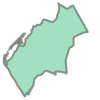

In [5]:
region_geometry

In [6]:

# Define the Overpass API query
query = f"""
[out:json];
way["waterway"](around:{region_geometry.centroid.y},{region_geometry.centroid.x},500);
out center;
"""

# Initialize Overpass API
api = op.Overpass()

# Execute the query
result = api.query(query)

# Process the query results
water_infrastructure = []

for way in result.ways:
    coordinates = [(node.lon, node.lat) for node in way.nodes]
    tags = way.tags
    water_infrastructure.append({
        'coordinates': coordinates,
        'tags': tags
    })

# Print the water infrastructure data
for entry in water_infrastructure:
    print("Coordinates:", entry['coordinates'])
    print("Tags:", entry['tags'])
    print("-" * 30)


OverpassBadRequest: Error: line 3: static error: For the attribute &quot;radius&quot; of the element &quot;around&quot; the only allowed values are nonnegative floats. 
Error: line 3: static error: For the attribute &quot;lon&quot; of the element &quot;around&quot; the only allowed values are floats between -1800.0 and 180.0 or an empty value. 